In [1]:
import pandas as pd
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter('ignore')




In [6]:
weather_data = pd.read_csv('../csv_downloads/merged_data_2.csv')

weather_data

Time  month  day  hour  Energy (Wh)   temp  feels_like  \
0      2019-03-22 07:00:00      3   22     7          124  37.22       37.22   
1      2019-03-22 08:00:00      3   22     8         1437  35.92       35.92   
2      2019-03-22 09:00:00      3   22     9         2602  34.81       31.32   
3      2019-03-22 10:00:00      3   22    10         4759  33.33       30.83   
4      2019-03-22 11:00:00      3   22    11         6529  31.68       31.68   
...                    ...    ...  ...   ...          ...    ...         ...   
13141  2021-08-25 20:00:00      8   25    20            0  83.35       84.52   
13142  2021-08-26 06:00:00      8   26     6            9  65.80       65.43   
13143  2021-08-26 07:00:00      8   26     7          465  65.37       64.90   
13144  2021-08-26 08:00:00      8   26     8         1188  64.44       63.91   
13145  2021-08-26 09:00:00      8   26     9         1231  64.11       63.66   

       pressure  humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_1h  \
0          1019        71        1.01       350     0.00      0.0      0.0   
1          1020        72        1.01       344     0.00      0.0      0.0   
2          1020        74        4.00        55     0.00      0.0      0.0   
3          1020        77        3.00        31     0.00      0.0      0.0   
4          1021        79        1.01         5     0.00      0.0      0.0   
...         ...       ...         ...       ...      ...      ...      ...   
13141      1019        51        5.99        15     0.00      0.0      0.0   
13142      1021        71        3.44        10     0.00      0.0      0.0   
13143      1021        70        1.01        67     0.25      0.0      0.0   
13144      1021        71        4.61        20     0.00      0.0      0.0   
13145      1021        73        1.99        92     0.00      0.0      0.0   

       snow_3h  clouds_all  weather_id weather_main weather_description  
0          0.0           1         800        Clear        sky is clear  
1          0.0           1         800        Clear        sky is clear  
2          0.0           1         800        Clear        sky is clear  
3          0.0           1         800        Clear        sky is clear  
4          0.0           1         800        Clear        sky is clear  
...        ...         ...         ...          ...                 ...  
13141      0.0          20         801       Clouds          few clouds  
13142      0.0          20         801       Clouds          few clouds  
13143      0.0          20         500         Rain          light rain  
13144      0.0          40         802       Clouds    scattered clouds  
13145      0.0          75         803       Clouds       broken clouds  

[13146 rows x 19 columns]

In [3]:
X = weather_data[["month", "day", "hour", "weather_description"]]
y = weather_data['Energy (Wh)'].values.reshape(-1, 1)
print(X.shape, y.shape)


(13146, 4) (13146, 1)


In [5]:
# data = X.copy()

# data_binary_encoded = pd.get_dummies(data, columns=["weather_description"])
# data_binary_encoded.head()

X = pd.get_dummies(data, columns=["weather_description"])
y = weather_data['Energy (Wh)'].values.reshape(-1, 1)
X.head()

month  day  hour  weather_description_broken clouds  \
0      3   22     7                                  0   
1      3   22     8                                  0   
2      3   22     9                                  0   
3      3   22    10                                  0   
4      3   22    11                                  0   

   weather_description_few clouds  weather_description_fog  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   

   weather_description_haze  weather_description_heavy intensity rain  \
0                         0                                         0   
1                         0                                         0   
2                         0                                         0   
3                         0                                         0   
4                         0                                         0   

   weather_description_heavy snow  \
0                               0   
1                               0   
2                               0   
3                               0   
4                               0   

   weather_description_light intensity drizzle  ...  \
0                                            0  ...   
1                                            0  ...   
2                                            0  ...   
3                                            0  ...   
4                                            0  ...   

   weather_description_scattered clouds  weather_description_shower rain  \
0                                     0                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   

   weather_description_sky is clear  weather_description_smoke  \
0                                 1                          0   
1                                 1                          0   
2                                 1                          0   
3                                 1                          0   
4                                 1                          0   

   weather_description_snow  weather_description_thunderstorm  \
0                         0                                 0   
1                         0                                 0   
2                         0                                 0   
3                         0                                 0   
4                         0                                 0   

   weather_description_thunderstorm with heavy rain  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   weather_description_thunderstorm with light rain  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   weather_description_thunderstorm with rain  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   weather_description_very heavy rain  
0                                    0  
1   

In [6]:
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

month  day  hour  weather_description_broken clouds  \
7514       8    2    14                                  0   
3623      11    4    15                                  0   
12843      8    7    15                                  0   
3817      11   21     9                                  0   
8262       9   19    19                                  0   

       weather_description_few clouds  weather_description_fog  \
7514                                0                        0   
3623                                0                        0   
12843                               0                        0   
3817                                0                        0   
8262                                1                        0   

       weather_description_haze  weather_description_heavy intensity rain  \
7514                          0                                         0   
3623                          0                                         0   
12843                         0                                         0   
3817                          0                                         0   
8262                          0                                         0   

       weather_description_heavy snow  \
7514                                0   
3623                                0   
12843                               0   
3817                                0   
8262                                0   

       weather_description_light intensity drizzle  ...  \
7514                                             0  ...   
3623                                             0  ...   
12843                                            0  ...   
3817                                             0  ...   
8262                                             0  ...   

       weather_description_scattered clouds  weather_description_shower rain  \
7514                                      1                                0   
3623                                      0                                0   
12843                                     0                                0   
3817                                      0                                0   
8262                                      0                                0   

       weather_description_sky is clear  weather_description_smoke  \
7514                                  0                          0   
3623                                  0                          0   
12843                                 0                          0   
3817                                  0                          0   
8262                                  0                          0   

       weather_description_snow  weather_description_thunderstorm  \
7514                          0                                 0   
3623                          0                                 0   
12843                         0                                 0   
3817                          0                                 0   
8262                          0                                 0   

       weather_description_thunderstorm with heavy rain  \
7514                                                  0   
3623                                                  0   
12843                                                 0   
3817                                                  0   
8262                                                  0   

       weather_description_thunderstorm with light rain  \
7514                                                  0   
3623                                                  0   
12843                                                 0   
3817                                                  0   
8262                                                  0   

       weather_description_thunderstorm with rain  \
7514                                            0   
3623                                   

In [7]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

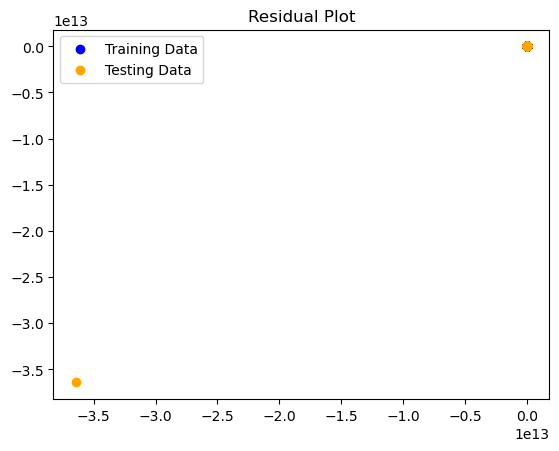

In [9]:
# %matplotlib inline
import matplotlib.pyplot as plt


# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st



In [88]:
weather_data.columns

Index(['Time', 'month', 'day', 'hour', 'Energy (Wh)', 'temp', 'feels_like',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h',
       'snow_1h', 'snow_3h', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description'],
      dtype='object')

In [90]:
cols = ['temp', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'clouds_all']

In [115]:
y = weather_data['Energy (Wh)']

#get data
for column in weather_data:       
    if column in cols:
        X = weather_data[column].array.reshape(-1, 1)

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
        y_train = y_train.to_numpy().reshape(-1,1)
        y_test = y_test.to_numpy().reshape(-1,1)

        X_scaler = StandardScaler().fit(X_train)
        y_scaler = StandardScaler().fit(y_train)

        X_train = X_scaler.transform(X_train)
        X_test = X_scaler.transform(X_test)
        y_train = y_scaler.transform(y_train)
        y_test = y_scaler.transform(y_test)
        
        # Create a linear model
        model = LinearRegression()

        # Fit (Train) our model to the data
        model.fit(X_train, y_train)


        # Use our model to predict a value
        predicted = model.predict(X_train)

        # Score the prediction with mse and r2
        mse = mean_squared_error(y_train, predicted)
        r2 = r2_score(y_train, predicted)   

        print(f"Between Energy Produced and {column}:") 
        print(f"Mean Squared Error (MSE): {mse}")
        print(f"R-squared (R2 ): {r2}")
        print(f"Model Score: {model.score(X_test, y_test)}")
        print("-----------------------------------------------")

ValueError: Expected 2D array, got 1D array instead:
array=[3267. 1780.  591. ... 6295. 2577. 2801.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [110]:
weather_data['clouds_all'].unique()

array([ 1, 40, 90, 75, 20])

Between Energy Produced and temp:
Correlation Coefficient: 0.11.
R2: 0.012283931049286588


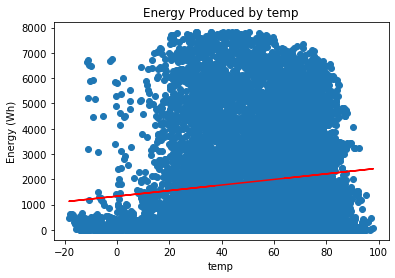

Between Energy Produced and pressure:
Correlation Coefficient: 0.08.
R2: 0.007130316703428713


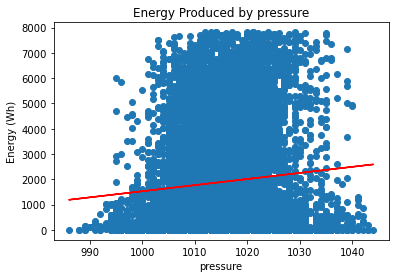

Between Energy Produced and humidity:
Correlation Coefficient: 0.02.
R2: 0.00028085246783191985


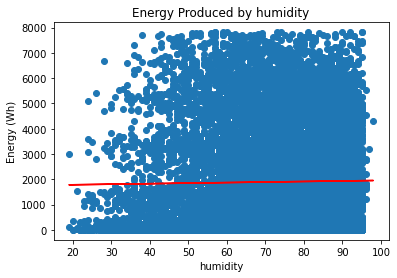

Between Energy Produced and wind_speed:
Correlation Coefficient: -0.1.
R2: 0.00917586673938012


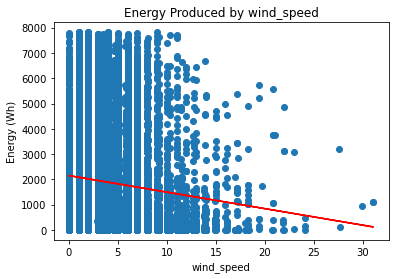

Between Energy Produced and wind_deg:
Correlation Coefficient: -0.01.
R2: 3.46461648128615e-05


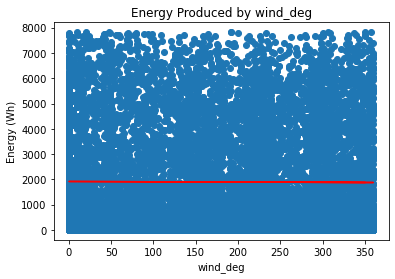

Between Energy Produced and clouds_all:
Correlation Coefficient: -0.25.
R2: 0.06297245915936842


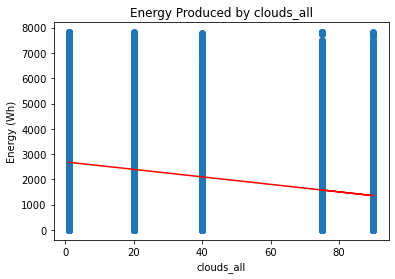

In [93]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
y_values = weather_data['Energy (Wh)']

#get data
for column in weather_data:       
    if column in cols:
        x_values = weather_data[column]


        #regression line
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
        #scatter plot
        plt.scatter(x_values,y_values)
        plt.title('Energy Produced by ' + column)
        plt.plot(x_values,regress_values,"r-")
        plt.xlabel(column)
        plt.ylabel('Energy (Wh)')

        #display data
        print(f"Between Energy Produced and {column}:") 
        print(f"Correlation Coefficient: {round(st.pearsonr(x_values,y_values)[0],2)}.")
        print(f"R2: {rvalue**2}")
        plt.show()

In [96]:
weather_data.clouds_all.unique()

array([ 1, 40, 90, 75, 20])